In [26]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [36]:
#make dataframe
df=pd.DataFrame(iris.data)
df['target']=iris.target
df['target_name']=df.target.apply(lambda x: iris.target_names[x])
df

,0,1,2,3,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [39]:
X=df.drop(['target','target_name'],axis='columns')
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [140]:
#80%
len(X_train)

120

In [141]:
#80%
len(y_train)

120

In [158]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)#n_estimators=10 is number of trees

In [159]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [160]:
model.score(X_test,y_test)

0.9666666666666667

In [161]:
model.predict(X_test)

array([0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 2, 1])

In [162]:
y_predicted=model.predict(X_test)

from sklearn.metrics import confusion_matrix
#pass test result mand model predicted result
cm=confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  8]], dtype=int64)

Text(69.0, 0.5, 'Inputed iris')

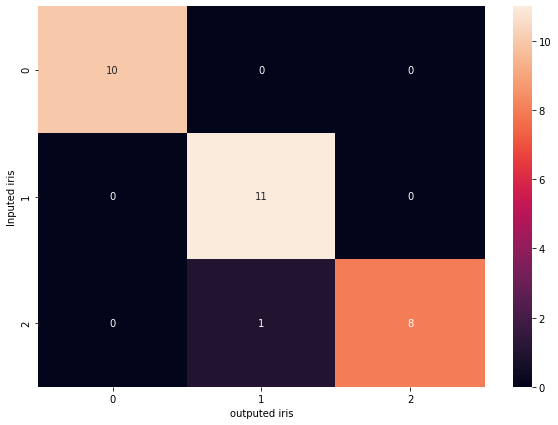

In [169]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel("outputed iris")
plt.ylabel("Inputed iris")